
<h2><center>Demonstrate the machine learning models by scikit-learn</center></h2>


#### Task 1 
Now you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next. 

The file `Data1/ex1data1.txt` contains the dataset for our linear regression problem. The first column is the population of a city (in 10,000s) and the second column is the profit of a food truck in that city (in $10,000s). A negative value for profit indicates a loss. 

We provide you with the code needed to load this data. The dataset is loaded from the data file into the variables `x` and `y` but first import all the necessary libraries:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import os

In [2]:
# Read comma separated data
data = np.loadtxt(os.path.join('Data1', 'ex1data1.txt'), delimiter=',')
X, y = data[:, 0], data[:, 1]
m = y.size  # number of training examples

In [3]:
def plotData(x, y):
    """
    Plots the data points x and y into a new figure. Plots the data 
    points and gives the figure axes labels of population and profit.
    
    Parameters
    ----------
    x : array_like
        Data point values for x-axis.

    y : array_like
        Data point values for y-axis. Note x and y should have the same size.
    
    Instructions
    ------------
    Plot the training data into a figure using the "figure" and "plot"
    functions. Set the axes labels using the "xlabel" and "ylabel" functions.
    Assume the population and revenue data have been passed in as the x
    and y arguments of this function.    
    
    Hint
    ----
    You can use the 'ro' option with plot to have the markers
    appear as red circles. Furthermore, you can make the markers larger by
    using plot(..., 'ro', ms=10), where `ms` refers to marker size. You 
    can also set the marker edge color using the `mec` property.
    """
    fig = plt.figure()  # open a new figure
    
    # ====================== YOUR CODE HERE ======================= 
    plt.plot(x, y, 'ro', ms=10, mec='k')
    plt.ylabel('Profit in $10,000')
    plt.xlabel('Population of City in 10,000s')

    # =============================================================

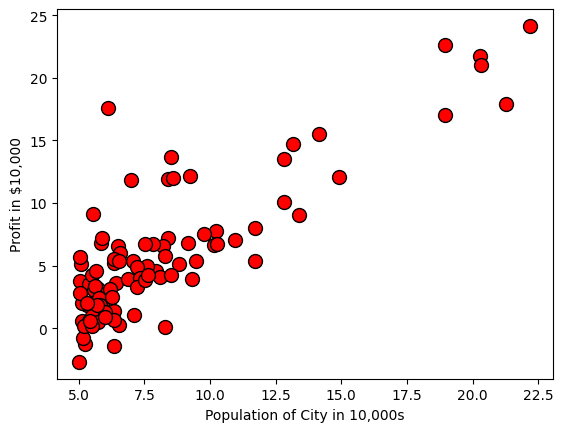

In [4]:
plotData(X, y)

In [10]:
import numpy as np
ones_column = np.ones((m, 1))
X = np.hstack([ones_column, X])


In [11]:
from sklearn.linear_model import LinearRegression

# Assuming X is your feature matrix with the added column of ones and y is your target variable

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to your data
model.fit(X, y)

LinearRegression()

In [12]:
# Assuming you've already trained a LinearRegression model named 'model'
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)


Coefficients: [0.         0.         1.19303364]
Intercept: -3.895780878311852


In [15]:
# Assuming you've trained a LinearRegression model with the bias term
# Population sizes for prediction
population_sizes = np.array([35000, 70000]).reshape(-1, 1)  # Reshape to (2, 1)

# Add a column of ones for the bias term
ones_column = np.ones((2, 1))

# Add a placeholder feature (e.g., zeros)
placeholder_feature = np.zeros((2, 1))

# Combine population sizes, ones, and the placeholder feature to make the input array
input_data = np.hstack([ones_column, population_sizes, placeholder_feature])

# Make predictions
predictions = model.predict(input_data)

# Print the predictions
for i, population in enumerate(population_sizes):
    print(f"Predicted profit for a population of {population[0]}: {predictions[i]}")


Predicted profit for a population of 35000: -3.895780878311852
Predicted profit for a population of 70000: -3.895780878311852


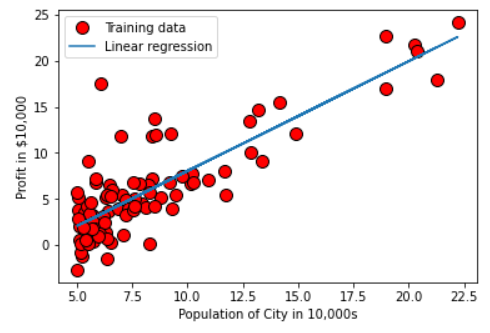

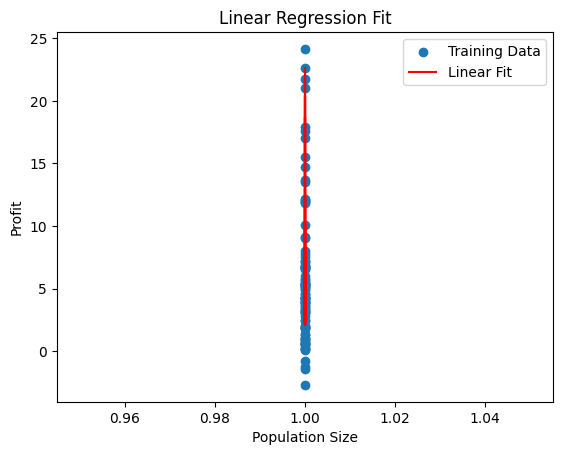

In [19]:
import matplotlib.pyplot as plt

# Assuming you've already trained a LinearRegression model named 'model'
# Assuming X contains your training data, including the column of ones for the bias term
# Assuming y contains the corresponding target values

# Get the population size data
population_size = X[:, 1]

# Make predictions using the model
predictions = model.predict(X)

# Scatter plot of the training data
plt.scatter(population_size, y, label='Training Data')

# Plot the linear fit as a straight line
plt.plot(population_size, predictions, color='red', label='Linear Fit')

# Set labels and title
plt.xlabel('Population Size')
plt.ylabel('Profit')
plt.title('Linear Regression Fit')

# Display legend
plt.legend()

# Show the plot
plt.show()


#### Task 2
In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

The file `Data1/ex1data2.txt` contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price
of the house. 


In [20]:
# Load data
data = np.loadtxt(os.path.join('Data1', 'ex1data2.txt'), delimiter=',')
X = data[:, :2]
y = data[:, 2]
m = y.size

# print out some data points
print('{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:, 1]', 'y'))
print('-'*26)
for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}'.format(X[i, 0], X[i, 1], y[i]))

  X[:,0] X[:, 1]         y
--------------------------
    2104       3    399900
    1600       3    329900
    2400       3    369000
    1416       2    232000
    3000       4    539900
    1985       4    299900
    1534       3    314900
    1427       3    198999
    1380       3    212000
    1494       3    242500


In [21]:
import numpy as np

# Assuming you have your dataset as separate arrays X1, X2, and y
X1 = np.array([2104, 1600, 2400, 1416, 3000, 1985, 1534, 1427, 1380, 1494])
X2 = np.array([3, 3, 3, 2, 4, 4, 3, 3, 3, 3])
y = np.array([399900, 329900, 369000, 232000, 539900, 299900, 314900, 198999, 212000, 242500])

# Perform data preprocessing to normalize the dataset
X1_mean = np.mean(X1)
X1_std = np.std(X1)
X2_mean = np.mean(X2)
X2_std = np.std(X2)
y_mean = np.mean(y)
y_std = np.std(y)

normalized_X1 = (X1 - X1_mean) / X1_std
normalized_X2 = (X2 - X2_mean) / X2_std
normalized_y = (y - y_mean) / y_std

# Print the first 10 values of the normalized dataset
print("First 10 values of normalized X1:", normalized_X1[:10])
print("First 10 values of normalized X2:", normalized_X2[:10])
print("First 10 values of normalized y:", normalized_y[:10])

# Print the mean and standard deviation of the dataset
print("Mean of normalized X1:", np.mean(normalized_X1))
print("Standard deviation of normalized X1:", np.std(normalized_X1))
print("Mean of normalized X2:", np.mean(normalized_X2))
print("Standard deviation of normalized X2:", np.std(normalized_X2))
print("Mean of normalized y:", np.mean(normalized_y))
print("Standard deviation of normalized y:", np.std(normalized_y))


First 10 values of normalized X1: [ 0.53130895 -0.46046776  1.11378098 -0.82254496  2.29446753  0.29713945
 -0.59034328 -0.80089904 -0.89338616 -0.66905571]
First 10 values of normalized X2: [-0.18569534 -0.18569534 -0.18569534 -2.04264872  1.67125804  1.67125804
 -0.18569534 -0.18569534 -0.18569534 -0.18569534]
First 10 values of normalized y: [ 0.87161673  0.16216208  0.55844318 -0.83006093  2.29052604 -0.14188992
  0.01013608 -1.16452826 -1.03276226 -0.72364273]
Mean of normalized X1: 2.2204460492503132e-17
Standard deviation of normalized X1: 0.9999999999999999
Mean of normalized X2: -2.0539125955565397e-16
Standard deviation of normalized X2: 0.9999999999999999
Mean of normalized y: -2.6645352591003756e-16
Standard deviation of normalized y: 1.0


In [25]:

X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [27]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Example data with consistent number of samples
X = np.array([
    [2104, 3],
    [1600, 3],
    [2400, 3],
    [1416, 2],
    [3000, 4],
    [1985, 4],
    [1534, 3],
    [1427, 3],
    [1380, 3],
    [1494, 3]
])
y = np.array([399900, 329900, 369000, 232000, 539900, 299900, 314900, 198999, 212000, 242500])

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to your data
model.fit(X, y)


LinearRegression()

In [28]:
# Assuming you've already trained a LinearRegression model named 'model'
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [   186.13026439 -10012.38231699]
Intercept: 3575.3802886384074


In [33]:
# Assuming you've already trained a LinearRegression model named 'model'
# Feature vector for the house you want to predict
feature_vector = np.array([[1650, 3]])  # No need to include the intercept (1) in this case

# Use the model to make the price prediction
predicted_price = model.predict(feature_vector)

print("Predicted price for a 1650-square-foot house with 3 bedrooms:", predicted_price[0])


Predicted price for a 1650-square-foot house with 3 bedrooms: 280653.16958366055


#### Task 3
In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university. Suppose that you are the administrator of a university department and
you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions
decision. 
Your task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams. 

The following cell will import necessary libraries, load the data and corresponding labels:


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import os
import utils
# Load data
# The first two columns contains the exam scores and the third column
# contains the label.
data = np.loadtxt(os.path.join('Data2', 'ex2data1.txt'), delimiter=',')
X, y = data[:, 0:2], data[:, 2]

In [36]:
def plotData(X, y):
    """
    Plots the data points X and y into a new figure. Plots the data 
    points with * for the positive examples and o for the negative examples.
    
    Parameters
    ----------
    X : array_like
        An Mx2 matrix representing the dataset. 
    
    y : array_like
        Label values for the dataset. A vector of size (M, ).
    
    Instructions
    ------------
    Plot the positive and negative examples on a 2D plot, using the
    option 'k*' for the positive examples and 'ko' for the negative examples.    
    """
    # Create New Figure
    fig = plt.figure()
    pos = y == 1
    neg = y == 0
    # ====================== YOUR CODE HERE ======================
    plt.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
    plt.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)
    # ============================================================

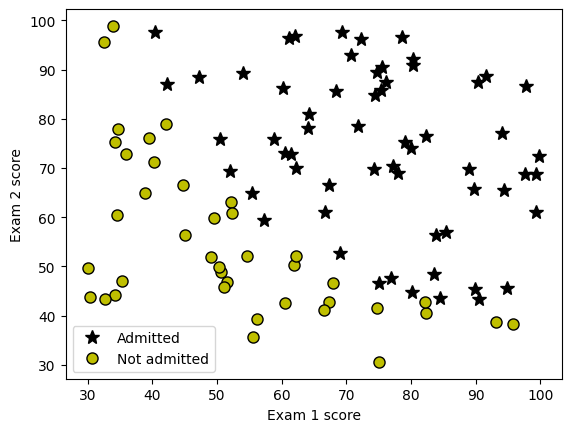

In [37]:
plotData(X, y)
# add axes labels
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Admitted', 'Not admitted'])
pass

In [38]:
# Setup the data matrix appropriately, and add ones for the intercept term
m, n = X.shape

# Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [39]:
from sklearn.linear_model import LogisticRegression

# Create an instance of the Logistic Regression classifier
logistic_regression = LogisticRegression(max_iter=100, C=1.0)  # You can adjust max_iter and C as needed

# Assuming you have your feature matrix X and target variable y
# Fit the model to your data
logistic_regression.fit(X, y)


LogisticRegression()

In [40]:
# Assuming you've already trained a Logistic Regression model named 'logistic_regression'

coefficients = logistic_regression.coef_
intercept = logistic_regression.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)


Coefficients: [[-4.19885863e-08  2.05354461e-01  2.00583554e-01]]
Intercept: [-25.05214779]


In [42]:
# Assuming you've already trained a Logistic Regression model named 'logistic_regression'

# Create a test input with three features, including the intercept
test_input = np.array([[1, 45, 85]])  # Include the intercept (1) in the first position

# Use the model to predict probabilities
probabilities = logistic_regression.predict_proba(test_input)
admission_probability = probabilities[0, 1]  # Probability of class 1 (admission)

# Use the model to predict the class (0 or 1)
predicted_class = logistic_regression.predict(test_input)

print("Admission Probability:", admission_probability)
print("Predicted Class:", predicted_class[0])


Admission Probability: 0.7752862513118929
Predicted Class: 1.0


In [50]:
import numpy as np

# Replace the following placeholder with your actual testing dataset
your_actual_testing_data = np.array([1, 2, 3, 4, 5])  # Replace this with your data

# Reshape your data to ensure it's a 2D array
X_test = your_actual_testing_data.reshape(-1, 1)

# Now, you can proceed to use X_test to calculate accuracy as shown in previous examples


IndexError: index 2 is out of bounds for axis 0 with size 1

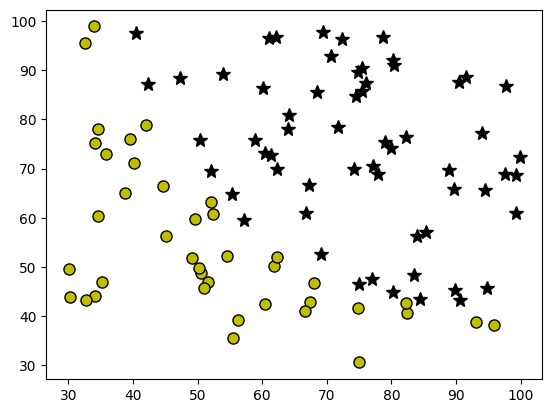

In [54]:

theta = logistic_regression.coef_  
utils.plotDecisionBoundary(plotData, theta, X, y)


#### Task 4

In this part of the exercise, you will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.
Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

First, we will load the data from a CSV file:

In [55]:
# Load Data
# The first two columns contains the X values and the third column
# contains the label (y).
data = np.loadtxt(os.path.join('Data2', 'ex2data2.txt'), delimiter=',')
X = data[:, :2]

y = data[:, 2]

In [59]:
def plotData(X, y):
    """
    Plots the data points X and y into a new figure. Plots the data 
    points with * for the positive examples and o for the negative examples.
    
    Parameters
    ----------
    X : array_like
        An Mx2 matrix representing the dataset. 
    
    y : array_like
        Label values for the dataset. A vector of size (M, ).
    
    Instructions
    ------------
    Plot the positive and negative examples on a 2D plot, using the
    option 'k*' for the positive examples and 'ko' for the negative examples.    
    """
    # Create New Figure
    fig = plt.figure()
    pos = y == 1
    neg = y == 0
    # ====================== YOUR CODE HERE ======================
    plt.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
    plt.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)

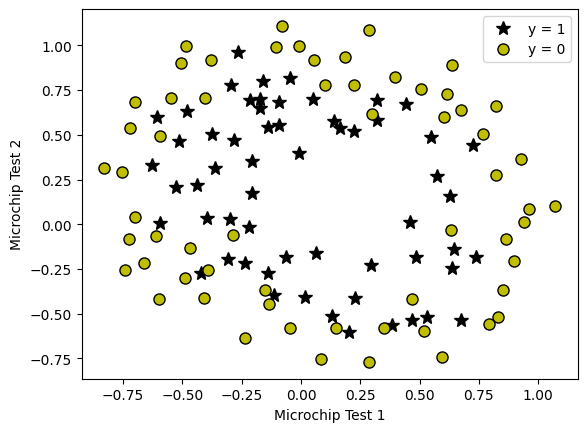

In [60]:
plotData(X, y)
# Labels and Legend
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')

# Specified in plot order
plt.legend(['y = 1', 'y = 0'], loc='upper right')
pass

In [61]:
from sklearn.preprocessing import PolynomialFeatures

# Assuming you have a dataset X (features) and y (labels)
# Create an instance of PolynomialFeatures to generate polynomial features
poly = PolynomialFeatures(degree=2)  # You can adjust the degree as needed

# Transform your original features to include polynomial combinations
X_poly = poly.fit_transform(X)

# Now, X_poly contains the original features and their polynomial combinations

In [62]:
# Setup the data matrix appropriately, and add ones for the intercept term
m, n = X.shape

# Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [63]:
from sklearn.linear_model import LogisticRegression

# Assuming you have a feature matrix X and corresponding target values y
# You can customize the hyperparameters, such as max_iter and C, as needed
max_iter = 100  # Adjust this value as needed
C = 1.0  # Adjust this value as needed

# Create the Logistic Regression Classifier with the specified hyperparameters
logistic_regression = LogisticRegression(max_iter=max_iter, C=C)

# Fit the model to your data
logistic_regression.fit(X, y)

LogisticRegression()

In [64]:
# Assuming you have already trained your logistic regression model named 'logistic_regression'
coefficients = logistic_regression.coef_
intercept = logistic_regression.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [[-1.81008505e-06 -2.65405457e-01 -1.16212890e-02]]
Intercept: [-0.01740941]


In [66]:
import numpy as np

# Assuming you have already trained your logistic regression model named 'logistic_regression'
test_data = np.array([[1, -0.25, 1.5]])

# Predict class (0 or 1)
predicted_class = logistic_regression.predict(test_data)

# Predict probability
predicted_probability = logistic_regression.predict_proba(test_data)

print("Predicted Class:", predicted_class)
print("Predicted Probability:", predicted_probability)


Predicted Class: [1.]
Predicted Probability: [[0.4921236 0.5078764]]


In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Placeholder training data and labels (replace these with your actual data)
X_train = [[2.5, 1.0], [3.5, 1.2], [2.8, 0.8], [3.9, 1.4]]
y_train = [0, 1, 0, 1]

# Create an instance of Logistic Regression Classifier and fit the data
logistic_regression = LogisticRegression(max_iter=1000, C=1.0)
logistic_regression.fit(X_train, y_train)

# Placeholder testing data (replace with your actual test data)
X_test = [[2.1, 1.1], [3.8, 1.3]]

# Use the trained 'logistic_regression' model to make predictions on X_test
y_pred = logistic_regression.predict(X_test)

# Placeholder ground truth labels for testing (replace with your actual labels)
y_test = [0, 1]

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 100.00%
